In [6]:
# Importul bibliotecilor necesare
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Configurarea stilului pentru grafice
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Bibliotecile au fost importate cu succes!")


Bibliotecile au fost importate cu succes!


In [7]:
# Încărcarea și explorarea datelor
df = pd.read_csv('clwin_final.csv')

print("Primele 5 rânduri din dataset:")
print(df.head())
print("\nInformații generale despre dataset:")
print(df.info())
print("\nStatistici descriptive:")
print(df.describe())
print(f"\nNumărul total de cluburi: {len(df)}")
print(f"Numărul de țări reprezentate: {df['country'].nunique()}")
print(f"Numărul total de victorii: {df['wins'].sum()}")


Primele 5 rânduri din dataset:
   Unnamed: 0      country       club  wins
0           1        Spain       Real    15
1           2        Italy      Milan     7
2           3      England  Liverpool     6
3           4      Germany     Bayern     6
4           5  Netherlands       Ajax     5

Informații generale despre dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  23 non-null     int64 
 1   country     23 non-null     object
 2   club        23 non-null     object
 3   wins        23 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 868.0+ bytes
None

Statistici descriptive:
       Unnamed: 0       wins
count    23.00000  23.000000
mean     12.00000   3.043478
std       6.78233   3.240065
min       1.00000   1.000000
25%       6.50000   1.000000
50%      12.00000   2.000000
75%      17.50000   4.000000
max      

Victorii pe țări:
country
Spain          20
England        15
Italy          12
Germany         8
Netherlands     7
Portugal        4
France          2
Romania         1
Scotland        1
Name: wins, dtype: int64


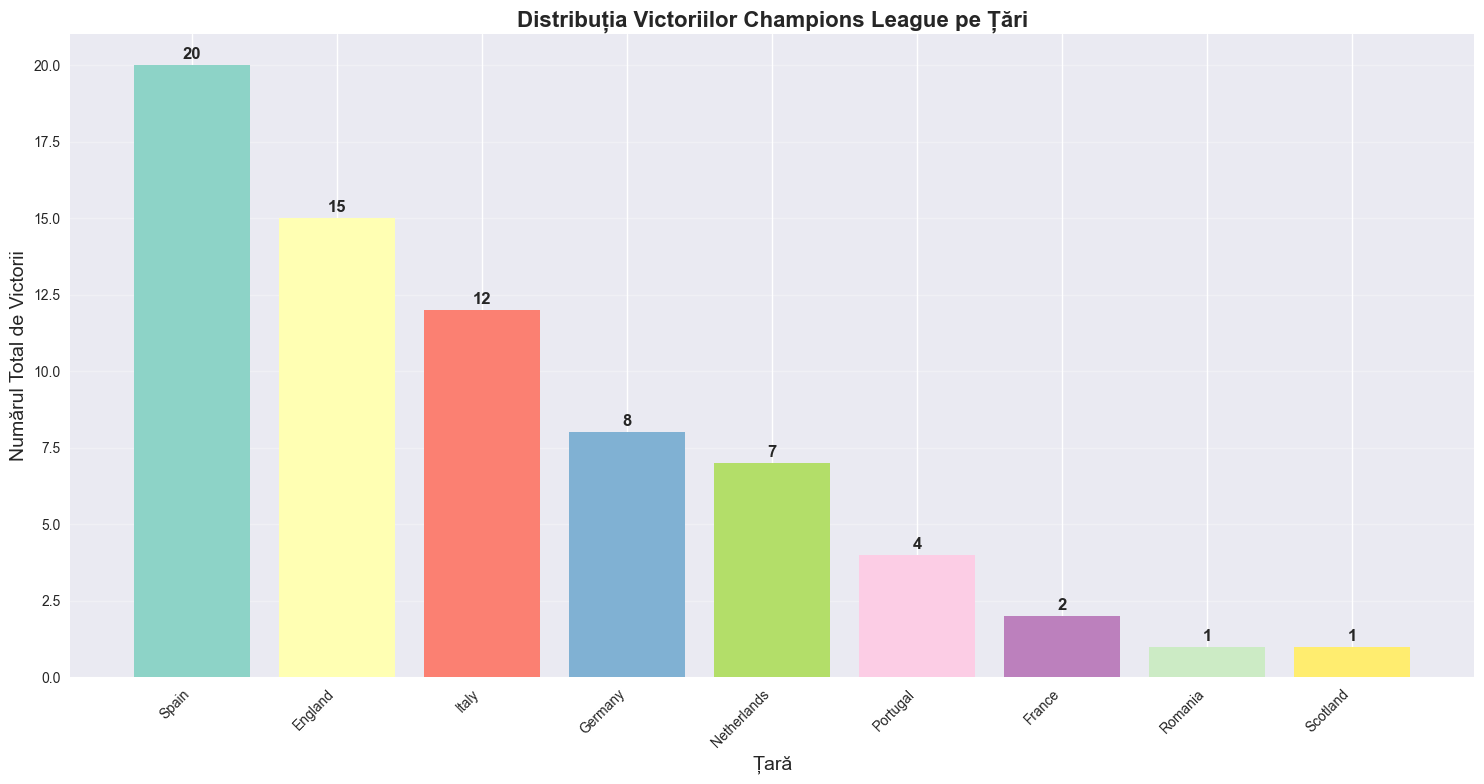

In [8]:
# Gruparea pe țări și calcularea totalului de victorii
country_wins = df.groupby('country')['wins'].sum().sort_values(ascending=False)
print("Victorii pe țări:")
print(country_wins)

# Grafic 1: Bar chart pentru victorii pe țări
plt.figure(figsize=(15, 8))
bars = plt.bar(country_wins.index, country_wins.values, color=plt.cm.Set3(np.linspace(0, 1, len(country_wins))))
plt.title('Distribuția Victoriilor Champions League pe Țări', fontsize=16, fontweight='bold')
plt.xlabel('Țară', fontsize=14)
plt.ylabel('Numărul Total de Victorii', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Adăugarea valorilor pe bare
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()


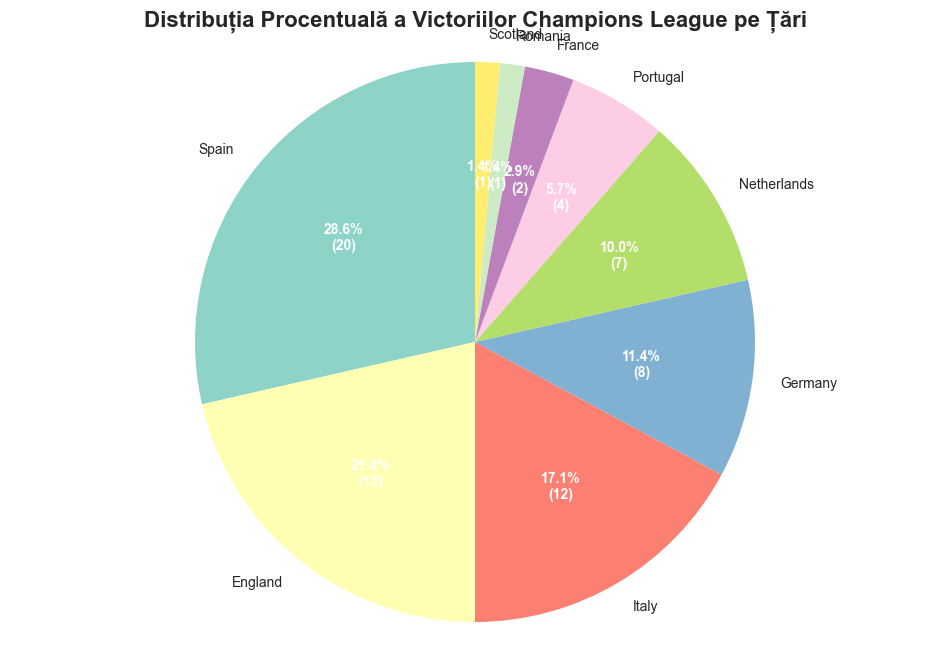

In [9]:
# Grafic 2: Pie chart pentru distribuția procentuală pe țări
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(country_wins)))

# Calcularea procentajelor
total_wins = country_wins.sum()
percentages = (country_wins / total_wins) * 100

wedges, texts, autotexts = plt.pie(country_wins.values, labels=country_wins.index, 
                                   autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*total_wins)})', 
                                   colors=colors, startangle=90, textprops={'fontsize': 10})

plt.title('Distribuția Procentuală a Victoriilor Champions League pe Țări', fontsize=16, fontweight='bold')

# Îmbunătățirea aspectului textului
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.axis('equal')
plt.show()


Top 10 cluburi cu cele mai multe victorii:
          club      country  wins
0         Real        Spain    15
1        Milan        Italy     7
2    Liverpool      England     6
3       Bayern      Germany     6
4         Ajax  Netherlands     5
5    Barcelona        Spain     5
6   Man United      England     3
7        Inter        Italy     3
10    Juventus        Italy     2
12    FC Porto     Portugal     2


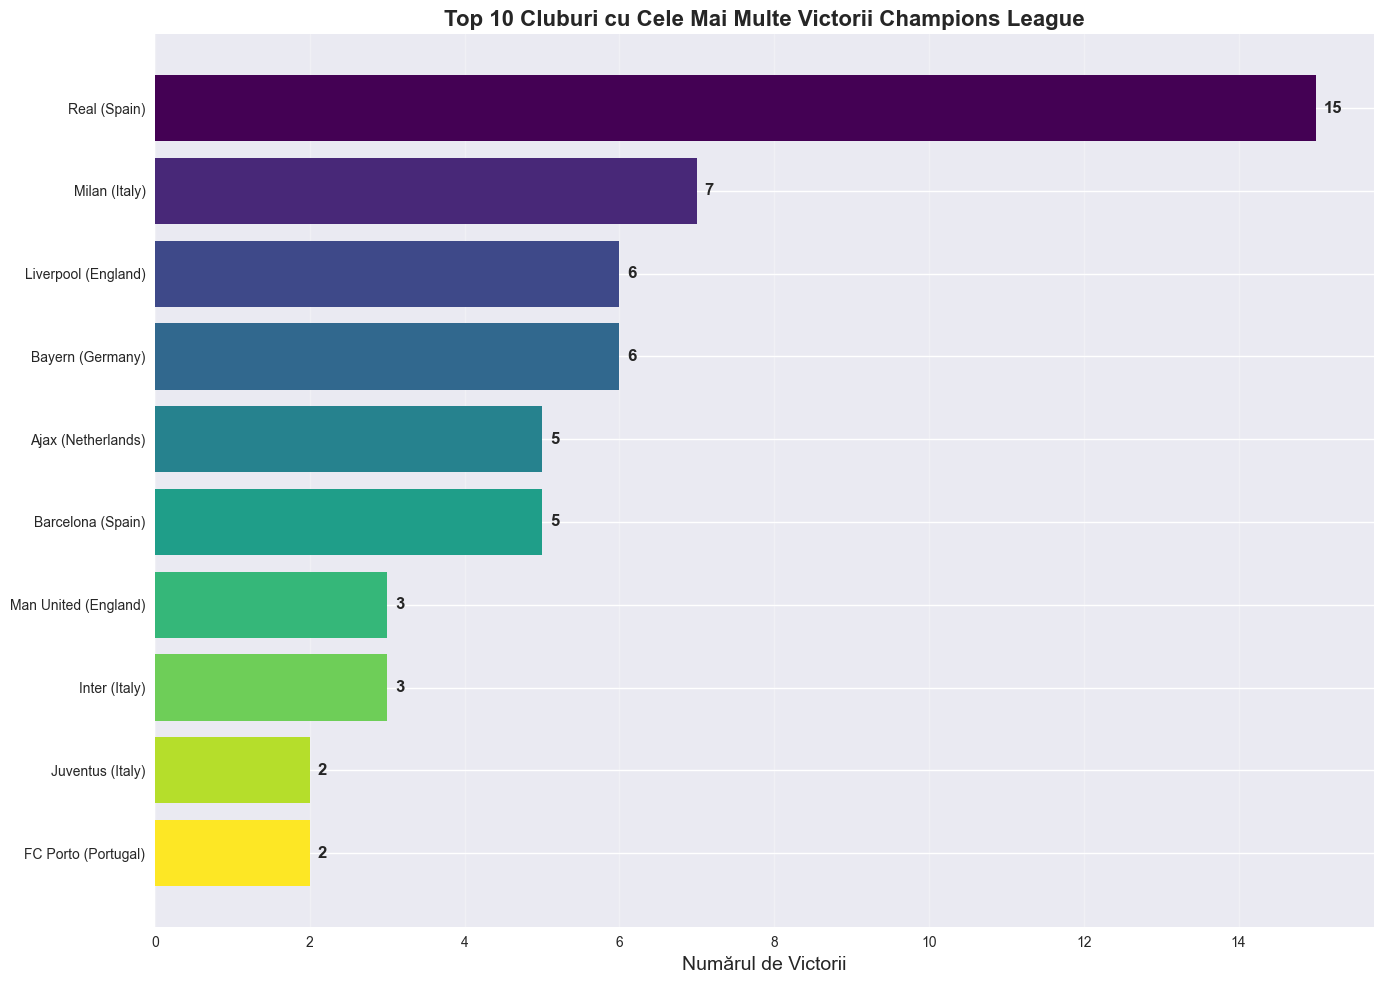

In [10]:
# Sortarea cluburilor după numărul de victorii
top_clubs = df.sort_values('wins', ascending=False)
print("Top 10 cluburi cu cele mai multe victorii:")
print(top_clubs.head(10)[['club', 'country', 'wins']])

# Grafic 3: Top 10 cluburi - bar chart orizontal
plt.figure(figsize=(14, 10))
top_10 = top_clubs.head(10)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10)))

bars = plt.barh(range(len(top_10)), top_10['wins'], color=colors)
plt.yticks(range(len(top_10)), [f"{club} ({country})" for club, country in zip(top_10['club'], top_10['country'])])
plt.xlabel('Numărul de Victorii', fontsize=14)
plt.title('Top 10 Cluburi cu Cele Mai Multe Victorii Champions League', fontsize=16, fontweight='bold')

# Adăugarea valorilor la sfârșitul barelor
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', ha='left', va='center', fontweight='bold')

plt.gca().invert_yaxis()  # Pentru a avea primul loc sus
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


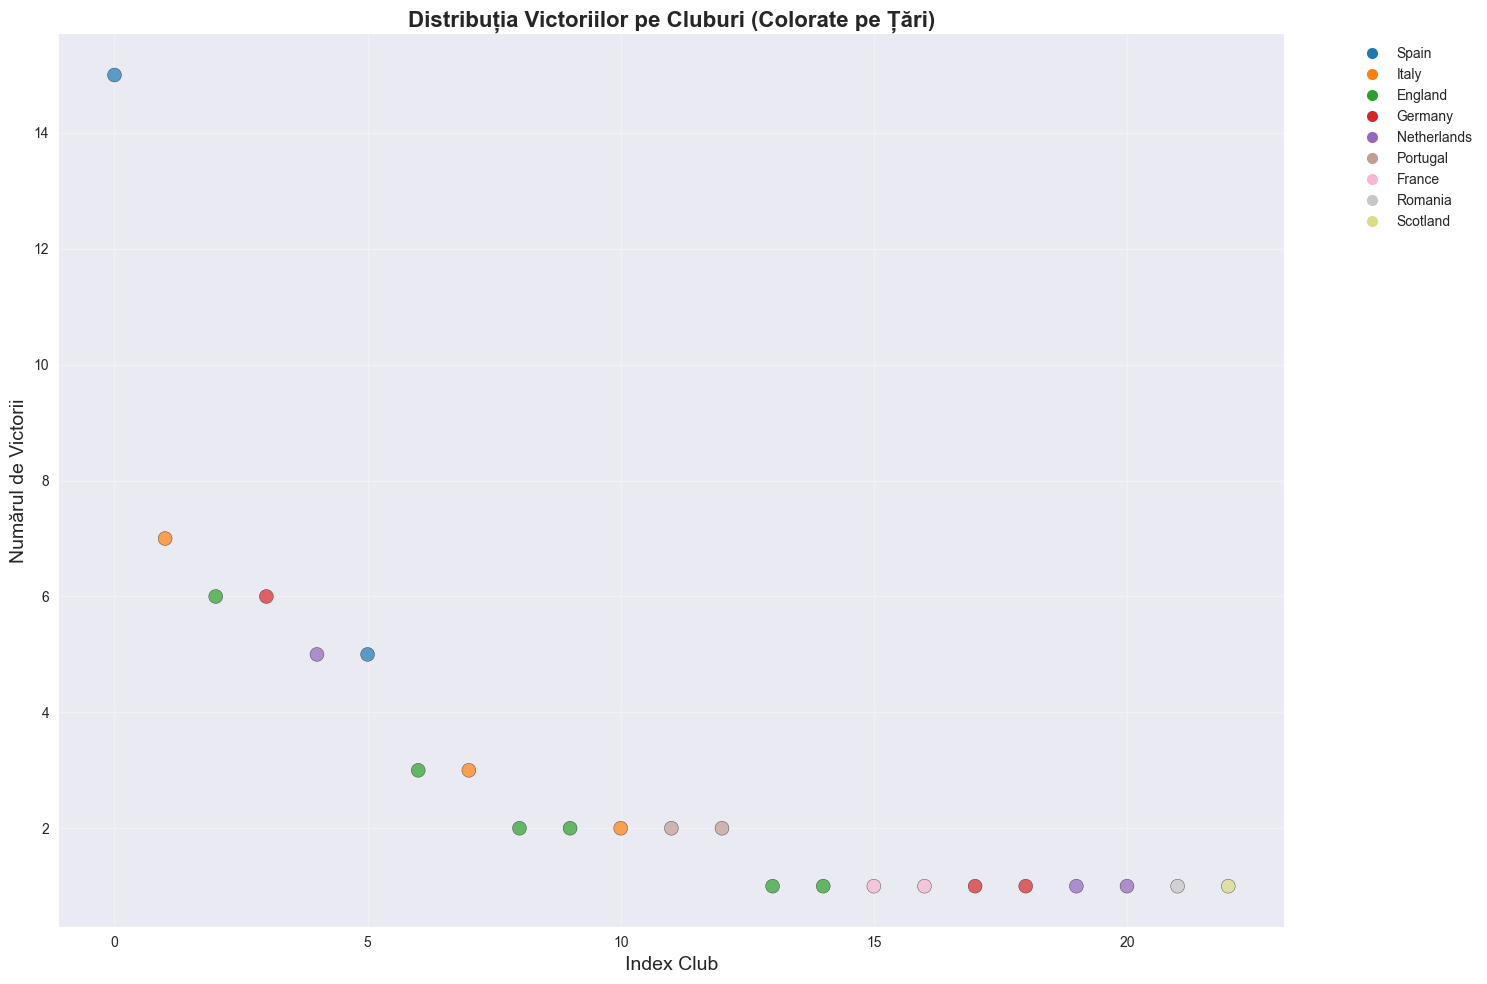

In [11]:
# Grafic 4: Scatter plot - Cluburi vs Victorii cu culori pe țări
plt.figure(figsize=(15, 10))

# Crearea unei mapări de culori pentru țări
unique_countries = df['country'].unique()
color_map = {country: plt.cm.tab20(i/len(unique_countries)) for i, country in enumerate(unique_countries)}
colors = [color_map[country] for country in df['country']]

scatter = plt.scatter(range(len(df)), df['wins'], c=colors, s=100, alpha=0.7, edgecolors='black')
plt.xlabel('Index Club', fontsize=14)
plt.ylabel('Numărul de Victorii', fontsize=14)
plt.title('Distribuția Victoriilor pe Cluburi (Colorate pe Țări)', fontsize=16, fontweight='bold')

# Adăugarea legendei pentru țări
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[country], 
                             markersize=8, label=country) for country in unique_countries]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


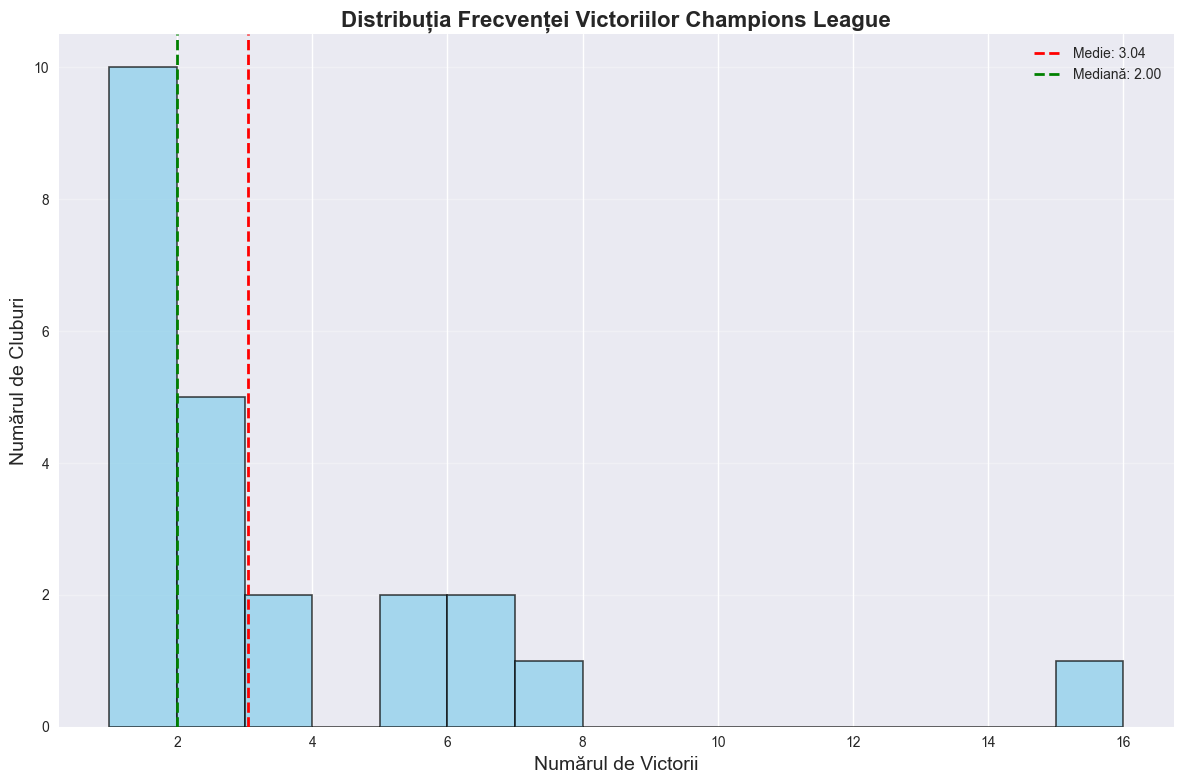

Statistici despre distribuția victoriilor:
Medie: 3.04
Mediană: 2.00
Deviația standard: 3.24
Min: 1, Max: 15


In [12]:
# Grafic 5: Histogram pentru distribuția victoriilor
plt.figure(figsize=(12, 8))
plt.hist(df['wins'], bins=range(1, max(df['wins'])+2), alpha=0.7, color='skyblue', 
         edgecolor='black', linewidth=1.2)
plt.xlabel('Numărul de Victorii', fontsize=14)
plt.ylabel('Numărul de Cluburi', fontsize=14)
plt.title('Distribuția Frecvenței Victoriilor Champions League', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Adăugarea statisticilor pe grafic
mean_wins = df['wins'].mean()
median_wins = df['wins'].median()
plt.axvline(mean_wins, color='red', linestyle='--', linewidth=2, label=f'Medie: {mean_wins:.2f}')
plt.axvline(median_wins, color='green', linestyle='--', linewidth=2, label=f'Mediană: {median_wins:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Statistici despre distribuția victoriilor:")
print(f"Medie: {mean_wins:.2f}")
print(f"Mediană: {median_wins:.2f}")
print(f"Deviația standard: {df['wins'].std():.2f}")
print(f"Min: {df['wins'].min()}, Max: {df['wins'].max()}")


/var/folders/93/qw471b_96px9kvlzs8__bk480000gn/T/ipykernel_21766/567042695.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(box_data, labels=country_labels, patch_artist=True)


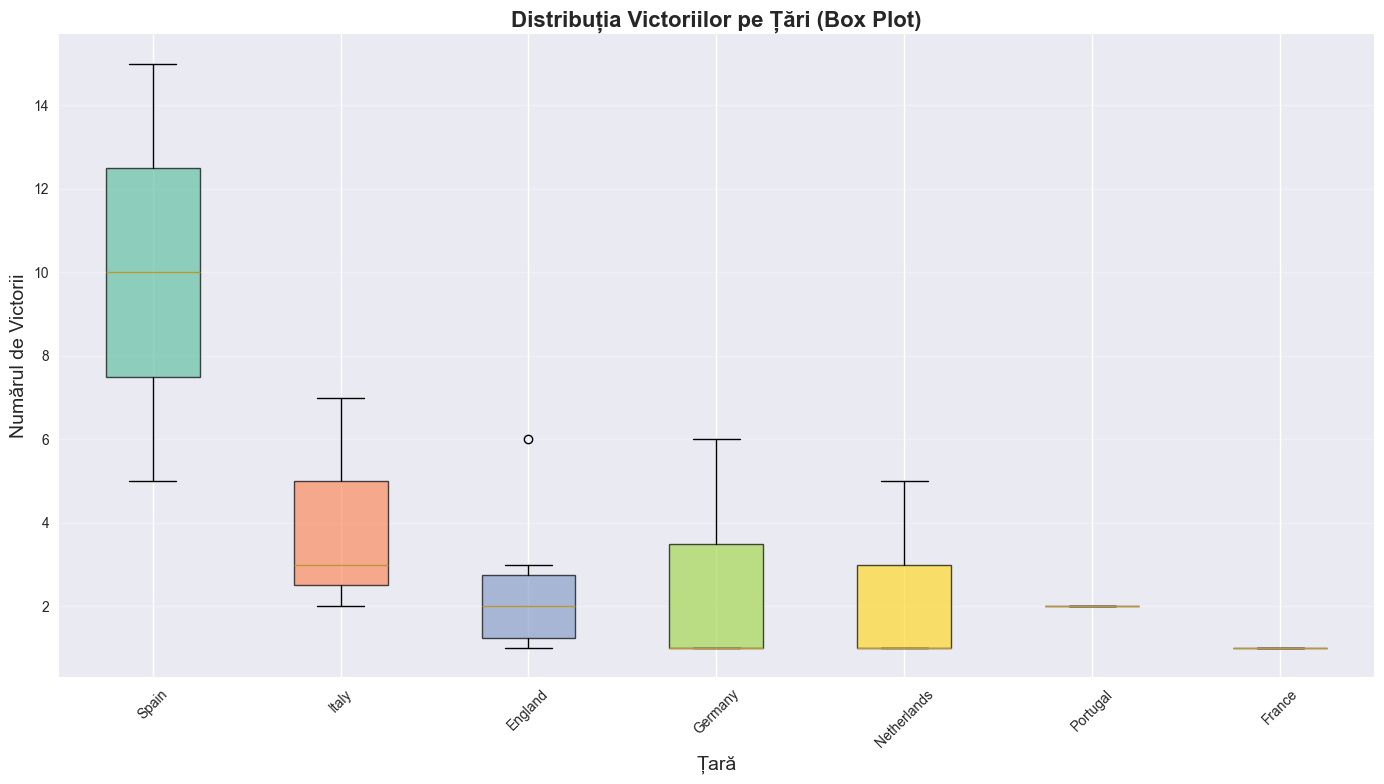

In [13]:
# Grafic 6: Box plot pentru victorii pe țări
plt.figure(figsize=(14, 8))
countries_with_multiple_clubs = df.groupby('country').size()
countries_with_multiple = countries_with_multiple_clubs[countries_with_multiple_clubs > 1].index

# Filtrăm doar țările cu mai multe cluburi pentru box plot
df_multiple = df[df['country'].isin(countries_with_multiple)]

box_data = [df_multiple[df_multiple['country'] == country]['wins'].values 
            for country in df_multiple['country'].unique()]
country_labels = df_multiple['country'].unique()

bp = plt.boxplot(box_data, labels=country_labels, patch_artist=True)

# Colorarea cutiilor
colors = plt.cm.Set2(np.linspace(0, 1, len(bp['boxes'])))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.xlabel('Țară', fontsize=14)
plt.ylabel('Numărul de Victorii', fontsize=14)
plt.title('Distribuția Victoriilor pe Țări (Box Plot)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


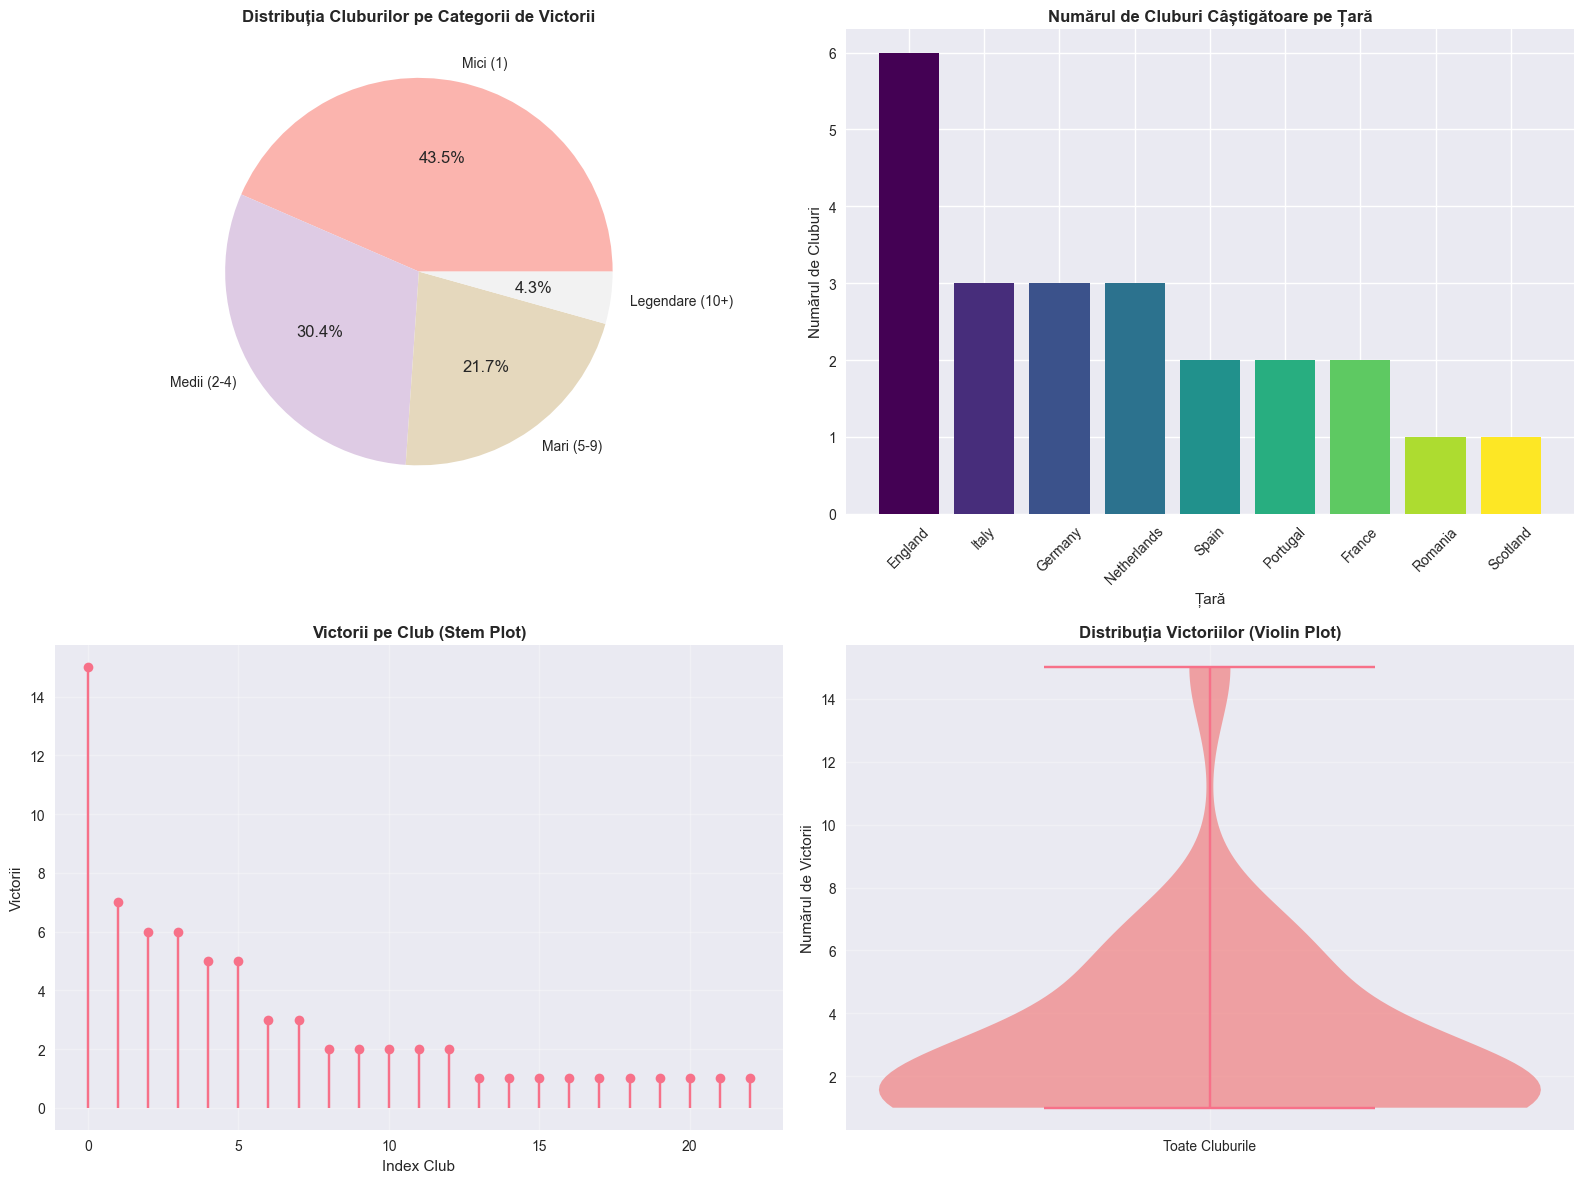

In [14]:
# Grafic 7: Heatmap - Matrice de corelație și analiză avansată
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Pie chart pentru categorii de victorii
def categorize_wins(wins):
    if wins >= 10:
        return 'Legendare (10+)'
    elif wins >= 5:
        return 'Mari (5-9)'
    elif wins >= 2:
        return 'Medii (2-4)'
    else:
        return 'Mici (1)'

df['win_category'] = df['wins'].apply(categorize_wins)
category_counts = df['win_category'].value_counts()

ax1.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.Pastel1(np.linspace(0, 1, len(category_counts))))
ax1.set_title('Distribuția Cluburilor pe Categorii de Victorii', fontweight='bold')

# Subplot 2: Bar chart pentru numărul de cluburi pe țară
clubs_per_country = df['country'].value_counts()
bars2 = ax2.bar(clubs_per_country.index, clubs_per_country.values, 
                color=plt.cm.viridis(np.linspace(0, 1, len(clubs_per_country))))
ax2.set_title('Numărul de Cluburi Câștigătoare pe Țară', fontweight='bold')
ax2.set_xlabel('Țară')
ax2.set_ylabel('Numărul de Cluburi')
ax2.tick_params(axis='x', rotation=45)

# Subplot 3: Stem plot pentru victorii
ax3.stem(range(len(df)), df['wins'], basefmt=' ')
ax3.set_title('Victorii pe Club (Stem Plot)', fontweight='bold')
ax3.set_xlabel('Index Club')
ax3.set_ylabel('Victorii')
ax3.grid(True, alpha=0.3)

# Subplot 4: Violin plot pentru distribuția victoriilor
parts = ax4.violinplot([df['wins']], positions=[1], widths=0.5)
for pc in parts['bodies']:
    pc.set_facecolor('lightcoral')
    pc.set_alpha(0.7)
ax4.set_title('Distribuția Victoriilor (Violin Plot)', fontweight='bold')
ax4.set_ylabel('Numărul de Victorii')
ax4.set_xticks([1])
ax4.set_xticklabels(['Toate Cluburile'])
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Analiza detaliată a datelor
print("=== ANALIZĂ DETALIATĂ A DATELOR CHAMPIONS LEAGUE ===")
print(f"\n📊 STATISTICI GENERALE:")
print(f"  • Total cluburi analizate: {len(df)}")
print(f"  • Total țări reprezentate: {df['country'].nunique()}")
print(f"  • Total victorii Champions League: {df['wins'].sum()}")
print(f"  • Medie victorii per club: {df['wins'].mean():.2f}")
print(f"  • Mediană victorii: {df['wins'].median()}")

print(f"\n🏆 TOP PERFORMANȚE:")
top_club = df.loc[df['wins'].idxmax()]
print(f"  • Cel mai de succes club: {top_club['club']} ({top_club['country']}) - {top_club['wins']} victorii")

print(f"\n🌍 ANALIZĂ PE ȚĂRI:")
for country, data in df.groupby('country'):
    total_wins = data['wins'].sum()
    num_clubs = len(data)
    avg_wins = data['wins'].mean()
    print(f"  • {country}: {num_clubs} club(uri), {total_wins} victorii totale, {avg_wins:.1f} medie/club")

print(f"\n📈 DISTRIBUȚIA VICTORIILOR:")
win_distribution = df['wins'].value_counts().sort_index()
for wins, count in win_distribution.items():
    percentage = (count / len(df)) * 100
    print(f"  • {wins} {'victorie' if wins == 1 else 'victorii'}: {count} cluburi ({percentage:.1f}%)")

print(f"\n🔍 OBSERVAȚII INTERESANTE:")
spain_clubs = df[df['country'] == 'Spain']
print(f"  • Spania are {len(spain_clubs)} cluburi cu {spain_clubs['wins'].sum()} victorii totale")
england_clubs = df[df['country'] == 'England']
print(f"  • Anglia are {len(england_clubs)} cluburi cu {england_clubs['wins'].sum()} victorii totale")

one_win_clubs = df[df['wins'] == 1]
print(f"  • {len(one_win_clubs)} cluburi au câștigat exact o dată Champions League")

multiple_wins = df[df['wins'] > 1]
print(f"  • {len(multiple_wins)} cluburi au victorii multiple")


In [ ]:
# Grafic 8: Radar Chart pentru top 6 țări
from math import pi

top_countries = country_wins.head(6)
categories = ['Victorii Totale', 'Număr Cluburi', 'Medie/Club', 'Club Top', 'Diversitate', 'Eficiență']

# Calcularea valorilor pentru radar chart
radar_data = {}
for country in top_countries.index:
    country_data = df[df['country'] == country]
    total_wins = country_data['wins'].sum()
    num_clubs = len(country_data)
    avg_wins = country_data['wins'].mean()
    max_wins = country_data['wins'].max()
    
    radar_data[country] = [
        total_wins / max(country_wins) * 10,  # Normalized to 10
        num_clubs / max(df.groupby('country').size()) * 10,
        avg_wins / max(df.groupby('country')['wins'].mean()) * 10,
        max_wins / max(df['wins']) * 10,
        (num_clubs > 1) * 5 + (num_clubs > 3) * 5,  # Diversity score
        total_wins / num_clubs / (df['wins'].sum() / len(df)) * 5  # Efficiency
    ]

# Crearea radar chart
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

colors = plt.cm.Set2(np.linspace(0, 1, len(top_countries)))
for i, (country, values) in enumerate(radar_data.items()):
    values += values[:1]  # Complete the circle
    ax.plot(angles, values, 'o-', linewidth=2, label=country, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0, 10)
ax.set_title('Comparația Top 6 Țări - Radar Chart', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.tight_layout()
plt.show()


In [ ]:
# Grafic 9: Sankey-style visualization și grafic final de sinteză
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# Subplot 1: Stacked bar pentru victorii pe țări
countries_data = []
wins_1 = []
wins_2_4 = []
wins_5_plus = []

for country in df['country'].unique():
    country_clubs = df[df['country'] == country]
    countries_data.append(country)
    wins_1.append(len(country_clubs[country_clubs['wins'] == 1]))
    wins_2_4.append(len(country_clubs[(country_clubs['wins'] >= 2) & (country_clubs['wins'] <= 4)]))
    wins_5_plus.append(len(country_clubs[country_clubs['wins'] >= 5]))

x_pos = np.arange(len(countries_data))
width = 0.6

p1 = ax1.bar(x_pos, wins_1, width, label='1 victorie', color='lightcoral')
p2 = ax1.bar(x_pos, wins_2_4, width, bottom=wins_1, label='2-4 victorii', color='lightskyblue')
p3 = ax1.bar(x_pos, wins_5_plus, width, bottom=np.array(wins_1) + np.array(wins_2_4), 
             label='5+ victorii', color='lightgreen')

ax1.set_xlabel('Țară')
ax1.set_ylabel('Numărul de Cluburi')
ax1.set_title('Distribuția Cluburilor pe Categorii de Victorii și Țări')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(countries_data, rotation=45)
ax1.legend()

# Subplot 2: Area chart pentru victorii cumulative
sorted_clubs = df.sort_values('wins', ascending=False).reset_index(drop=True)
cumulative_wins = sorted_clubs['wins'].cumsum()

ax2.fill_between(range(len(sorted_clubs)), cumulative_wins, alpha=0.6, color='purple')
ax2.plot(range(len(sorted_clubs)), cumulative_wins, color='darkpurple', linewidth=2)
ax2.set_xlabel('Rangul Clubului')
ax2.set_ylabel('Victorii Cumulative')
ax2.set_title('Victorii Cumulative Champions League')
ax2.grid(True, alpha=0.3)

# Adăugarea unor puncte de referință
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
for p in percentiles:
    idx = int(len(sorted_clubs) * p)
    ax2.axvline(idx, color='red', linestyle='--', alpha=0.7)
    ax2.text(idx, cumulative_wins.iloc[idx], f'Top {int(p*100)}%', rotation=90, va='bottom')

# Subplot 3: Heatmap pentru țări vs categorii de victorii
category_country_matrix = pd.crosstab(df['win_category'], df['country'])
sns.heatmap(category_country_matrix, annot=True, fmt='d', cmap='YlOrRd', ax=ax3)
ax3.set_title('Heatmap: Categorii de Victorii vs Țări')
ax3.set_xlabel('Țară')
ax3.set_ylabel('Categoria de Victorii')

# Subplot 4: Grafic final de sinteză - Bubble chart
bubble_data = df.groupby('country').agg({
    'wins': ['sum', 'count', 'mean']
}).round(2)
bubble_data.columns = ['total_wins', 'num_clubs', 'avg_wins']
bubble_data = bubble_data.reset_index()

scatter = ax4.scatter(bubble_data['num_clubs'], bubble_data['avg_wins'], 
                     s=bubble_data['total_wins']*20, alpha=0.6, 
                     c=range(len(bubble_data)), cmap='viridis')

for i, row in bubble_data.iterrows():
    ax4.annotate(row['country'], (row['num_clubs'], row['avg_wins']), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax4.set_xlabel('Numărul de Cluburi')
ax4.set_ylabel('Media Victoriilor per Club')
ax4.set_title('Bubble Chart: Eficiența Țărilor în Champions League\n(Mărimea = Total Victorii)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
